In [5]:
from io import open  #to open files
import glob # to find files 
import os 

def findfiles(path): return glob.glob(path)
print(findfiles('data/names/*.txt'))

import unicodedata
import string
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )
print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]
for filename in findfiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']
Slusarski


In [7]:
category_lines.keys()

dict_keys(['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish'])

In [10]:
import torch
def lettertoindex(letter):
    return all_letters.find(letter) 

def lettertotensor(letter):
    tensor=torch.zeros(1,n_letters)
    tensor[0][lettertoindex(letter)]=1
    return tensor

#<line_length x 1 x n_letters>,
def linetotensor(line):
    tensor=torch.zeros(len(line),1,n_letters)

    for li, letter in enumerate(line):
        tensor[li][0][lettertoindex(letter)]=1
    return tensor

print(lettertoindex('K'))
print(lettertotensor('K'))
print(linetotensor('KAB'))



36
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.,

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(RNN, self).__init__()

        self.hidden_size=hidden_size

        self.i2h=nn.Linear(input_size,hidden_size)
        self.h2h=nn.Linear(hidden_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
    
    def forward(self,input,hidden):
        hidden=F.tanh(self.i2h(input) + self.h2h(hidden))
        output=self.h2o(hidden)
        output=self.softmax(output)

        return output,hidden
    
    def initHidden(self):
        return torch.zeros(1,self.hidden_size)

n_hidden=128
rnn = RNN(n_letters, n_hidden, n_categories)



In [31]:
input = lettertotensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [32]:
input = linetotensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
# print(all_categories[output.argmax()])

tensor([[-2.8047, -2.7681, -2.9307, -3.0991, -2.9937, -2.9386, -3.0229, -2.9605,
         -2.8789, -2.7682, -2.9588, -2.8628, -2.8266, -2.9056, -2.8780, -2.8063,
         -2.8083, -2.8847]], grad_fn=<LogSoftmaxBackward0>)


In [33]:
def categoryfromoutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [34]:
all_categories[output.topk(1)[1][0].item()]

'German'

In [35]:
criterion=nn.NLLLoss()


In [40]:
linetotensor('alber')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [41]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden=rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output,hidden=rnn(line_tensor[i],hidden)
    loss = criterion(output, category_tensor)
    loss.backward()
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    return output, loss.item()

In [42]:
import random

def randomchoice(l):
    return l[random.randint(0,len(l)-1)]

def randomTrainingExample():
    category=randomchoice(all_categories)
    line=randomchoice(category_lines[category])
    category_tensor=torch.tensor([all_categories.index(category)],dtype=torch.long)
    line_tensor=linetotensor(line)

    return category,line,category_tensor,line_tensor


for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)



category = Korean / line = Hong
category = Japanese / line = Yamada
category = Scottish / line = Hamilton
category = Dutch / line = Beek
category = Korean / line = Chung
category = Japanese / line = Nishimura
category = Arabic / line = Shadid
category = Czech / line = Sappe
category = Irish / line = Whalen
category = German / line = Baumann


In [43]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryfromoutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 4s) 2.0389 Favager / French ✓
10000 10% (0m 8s) 1.3255 Knef / German ✓
15000 15% (0m 12s) 0.6561 Shimazaki / Japanese ✓
20000 20% (0m 16s) 1.4674 Maria / Portuguese ✓
25000 25% (0m 19s) 0.5732 Sabbag / Arabic ✓
30000 30% (0m 23s) 0.6980 Fournier / French ✓
35000 35% (0m 27s) 1.7965 Sze  / Korean ✗ (Chinese)
40000 40% (0m 31s) 0.2323 Giang / Vietnamese ✓
45000 45% (0m 35s) 0.5094 Couture / French ✓
50000 50% (0m 39s) 0.4319 Vo / Vietnamese ✓
55000 55% (0m 43s) 0.5310 Sun / Korean ✓
60000 60% (0m 47s) 0.5823 Scavo / Italian ✓
65000 65% (0m 51s) 0.1526 Basara / Arabic ✓
70000 70% (0m 55s) 1.0878 Docherty / French ✗ (Scottish)
75000 75% (0m 59s) 2.0034 Eustis / Greek ✗ (French)
80000 80% (1m 3s) 0.1496 Laganas / Greek ✓
85000 85% (1m 7s) 1.2240 Lennon / English ✗ (Irish)
90000 90% (1m 11s) 1.2509 Danichkin / Irish ✗ (Russian)
95000 95% (1m 14s) 0.9486 Mizoguchi / Russian ✗ (Japanese)
100000 100% (1m 18s) 2.2921 Koci / Italian ✗ (Czech)


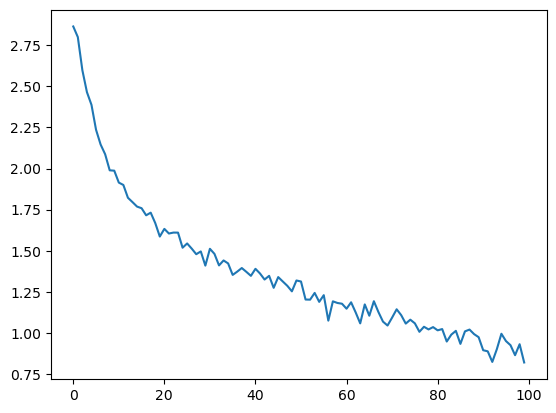

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

/var/folders/7j/6p_pd3gd44zfw3nn6n10_pnh0000gn/T/ipykernel_8887/1478501617.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/7j/6p_pd3gd44zfw3nn6n10_pnh0000gn/T/ipykernel_8887/1478501617.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


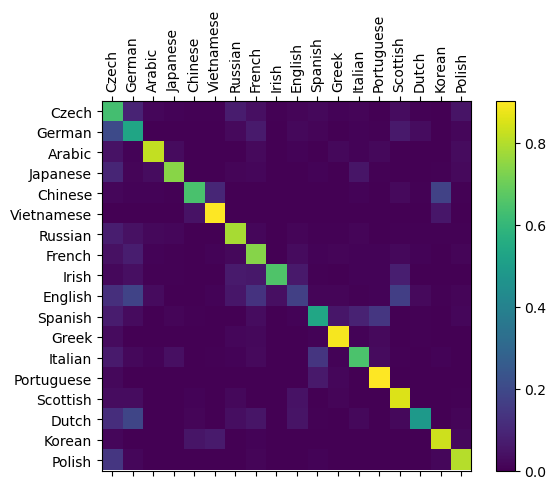

In [45]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryfromoutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [47]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(linetotensor
                          (input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.51) Czech
(-1.03) Russian
(-3.86) Polish

> Jackson
(-0.05) Scottish
(-3.47) English
(-5.03) Czech

> Satoshi
(-0.04) Japanese
(-4.25) Czech
(-4.51) Arabic
